# Likelihood

Let's make sure we understand a fundamental statistics concept which makes the logistic regression works before we even discuss the logistic regression.

Consider 2 Mangoes Farm. Here are some information about both of them.

- **Poon's Farm**
    - 70% of mango is sour. 30% is sweet
    
- **Ply's Farm**
    - 20% of mango is sour and 80% is sweet.

Now you found an unlabeled basket. With 6 Sour Mangoes and 4 Sweet Mangoes.

1) If this basket is from Poon's farm what is the probability that Poon's Farm would produce such basket?

In [1]:
from math import factorial as fac
def choose(n, r):
    return fac(n)/(fac(n-r)* fac(r))

In [2]:

0.7**6 * 0.3**4 * choose(10, 6)

0.20012094899999994

2) If this basket is from Ply's farm what is the probability that Ply's Farm would produce such basket?

In [3]:
0.2**6 * 0.8**4 * choose(10, 6)

0.005505024000000003

3) Where do you think the basket is from?

4) Is your logic correct? What you just calculated is called likelihood. Is it

$$
    P(Basket|Farm) \; \text{ or } \; P(Farm|Basket)
$$

5) If we want to label the basket, which one do we want to calculate?

$$
    P(Basket|Farm) \; \text{ or } \; P(Farm|Basket)
$$

6) But... what we did seems very reasonable. So, Let's try to understand it a bit more. We learned from last class that

$$
P(Ply | Basket) \times P(Basket) = P(Basket|Ply) \times P(Ply)
$$
and similarily
$$
P(Poon | Basket) \times P(Basket) = P(Basket|Poon) \times P(Poon)
$$

which means if we were to choose whether the Basket comes from Ply's farm of Poon's farm we can just compare the ratio

$$
    \frac{P(Ply | Basket)}{ P(Poon | Basket)} = \frac{P(Basket|Ply)}{ P(Basket|Poon) } \times \frac{P(Ply)}{P(Poon)}
$$

So when we pick one farm over the other based on the the comparison of $P(Basket|Ply)$ and  $P(Basket|Poon)$, what did we assume on the prior terms?

# Logistic Regression

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

Let us consider the following data in `xps` and `xms`. These are features of two classes +1 and -1.

When we have two classes we usually call them +1 and -1 since it simplify a lot of formula greatly.

### Main Idea

The main idea here is that we are given data of two classes and we want to build a **system** which can classify the data into the two classes based on the given feature.

To do that, we will search for the best the **data generator**. Then we will use that **data generator** to find the class.

A better concrete analogy would be that 

    1. you went into a warehouse full of fruit baskets which comes from the same farm. You are allowed to taste exactly one basket. 
    2. After tasting a basket and comparing likelihood, you conclude that the whole warehouse belongs to Plys' Farm. 
    3. Now given a random mango from the warehouse you can tell that there is an 80% chance that it will be a sweet mango
    
The technical details can be abit intimidating. But just keep this main idea in mind things will become a bit easier to understand.

In [5]:
np.random.seed(12345)
nplus = 1000
nminus = 500

xps = np.random.randn(nplus) + 2.
xms = np.random.randn(nminus)

alln = nplus + nminus

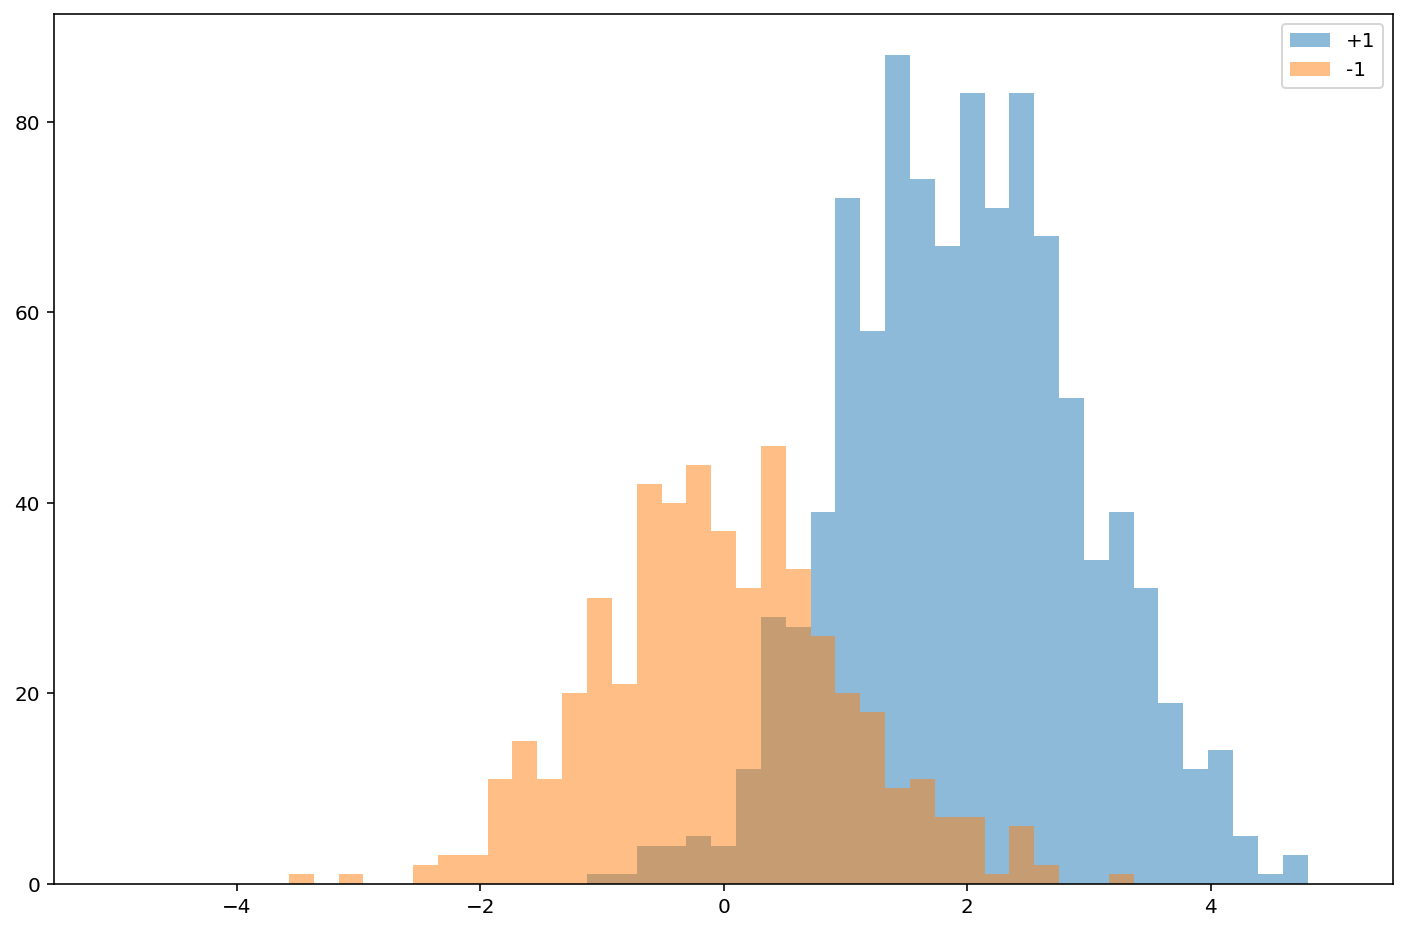

In [6]:
plt.figure(figsize=(12,8))
bins = np.linspace(-5,5,50)
hp, b1, p1 = plt.hist(xps, bins=bins, alpha=0.5, label='+1')
hm, b2, p2 = plt.hist(xms, bins=bins, alpha=0.5, label ='-1')
plt.legend()

1) First plot
$P(+1|x)$ vs $x$

`hp` and `hm` contains histogram value for class +1 and -1.

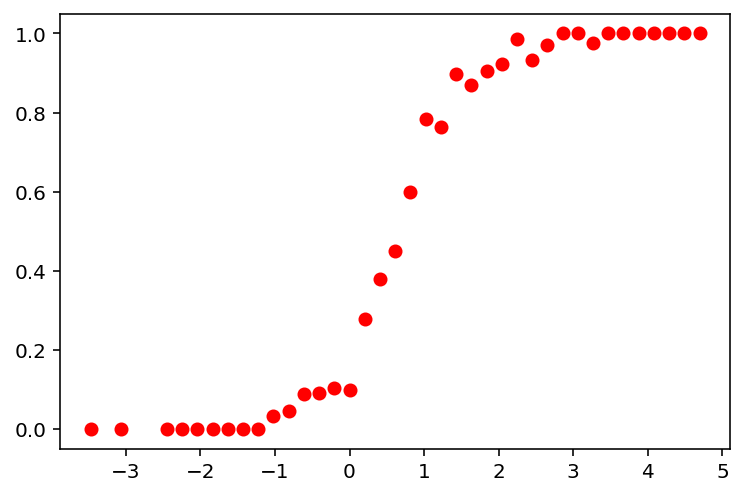

In [7]:
#I'm being nice for you
midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm) if x1+x2>0 ]
xs = [x for x,y in prob]
ys = [y for x,y in prob]
plt.plot(xs, ys, 'or')

In [ ]:
# bounded

2) Should you use linear regression $P(y = +1 | x) = mx + c$ to predict the probability? 


Why? If you have time try and see what happens.

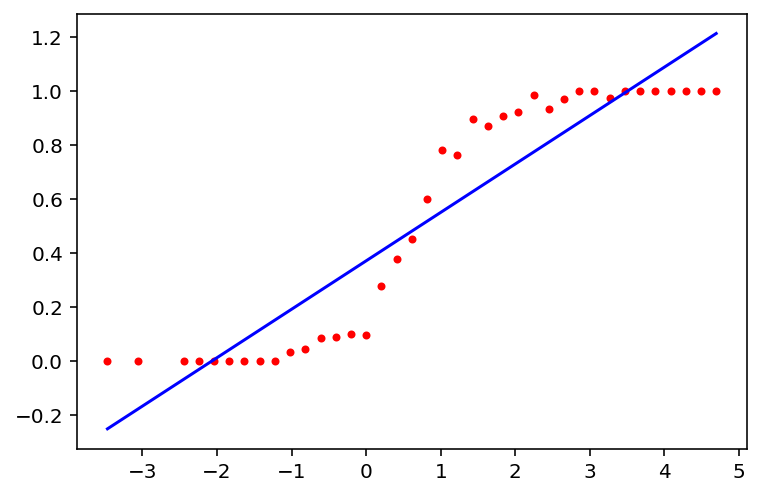

In [11]:
m, c = np.polyfit(xs, ys, 1)
plt.plot(xs ,ys, '.r')
plt.plot(xs, m*np.array(xs) + c, '-b')

## Theory


### Logistic Function

3) Plot with $s = -5 \ldots 5$ Then explain why it is preferred over linear function $ms +c$

$$\theta(s) = \frac{1}{1+e^{-s}}$$

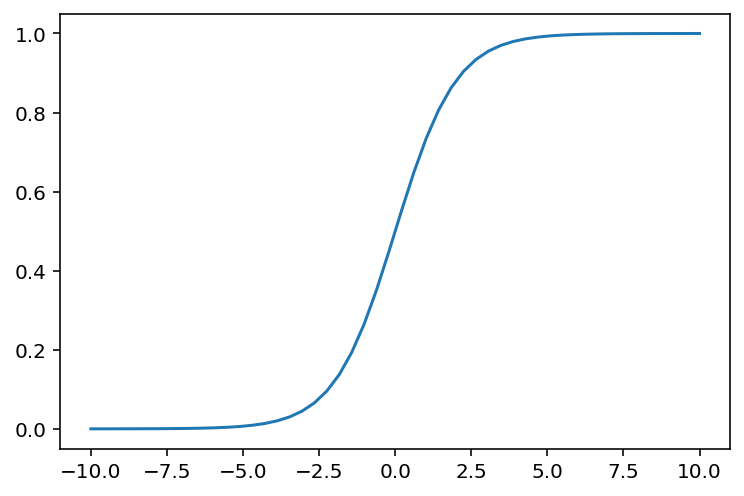

In [13]:
xs = np.linspace(-10, 10)
ys = 1/(1+ np.exp(-xs))
plt.plot(xs, ys)

4) Find $\theta(\infty)$ and $\theta(-\infty)$ and $\theta(0)$

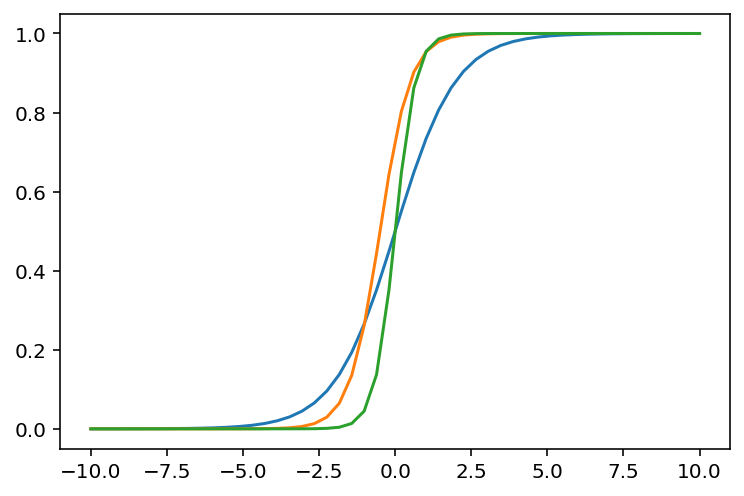

In [19]:
from scipy.special import expit
xs = np.linspace(-10, 10)
ys = expit(xs)
plt.plot(xs, ys)

ys = expit(2*xs+1)
plt.plot(xs, ys)

ys = expit(3*xs)
plt.plot(xs, ys)

5) Show that

$$1-\theta(s) = \theta(-s)$$

6) How should we compte $s$ from the features ?

7) Given that you use hypothesis $$ P_\vec{w}(1 | \vec{x}) = \theta(\vec{w}\cdot\vec{x}) $$
and that you only 2 classes (+1 and -1) what is

$$ P_\vec{w}(-1 | \vec{x})$$

8) What parameter parametrize your hypothesis?

9) Use the fact from 5) write what you found in 7 in a simpler form

$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \ldots & y = 1 \\
    \ldots & y = -1
\end{cases}
$$

10) Use the fact that $y\in\{-1, 1\}$ and convince yourself that what you wrote above is just

$$ P_\vec{w}\left(y|\vec{x} \right) = \theta\left(y \times \left( \vec{w} \cdot \vec{x} \right) \right)$$

11) How do we distinguish a good hypothesis from bad hypothesis? (good $\vec{w}$ from bad $\vec{w}$)

12) What does likelihood represents?

13) Let us do one concrete example here.  Calculate the likelihood for $\vec{w}$ given these data point
$$\vec{w}_1 = (1,2,3)$$
- A: $y = 1$, $x=[1, -1]$
- B: $y = -1$, $x=[-2, 1]$ 

Don't forget to pad your feature.

In [33]:
def theta(s):
    return 1.0/(1.0 + np.exp(-s))

theta(1* np.dot([1,2,3.], [1,1,-1.])) * theta(-1* np.dot([1,2,3.], [1,-2, 1.]))

0.25

In [34]:
theta(1* np.dot([1,1,1], [1,1,-1])) * theta(-1* np.dot([1,1,1], [1,-2, 1]))

0.36552928931500245

14) Is $\vec{w}_2 = (1,1,1)$ a better hypothesis?

15) What happen when we take log of the likelihood? Write down log likehood in terms of feature, weight and classes.

16) Does greater log likelihood indicate a better hypothesis? Or is it the other way around.

17) Write down our cost function. Do we want to maximize or minimize the cost function?

18) Turn what you found in 17 to minization problem.

19) Minimize it and try to debug it. You will most likely run into a bunch of numerical problems.

Hint: computer doesn't like '$e^x$ when $x$ is large. You may find numpy.clip useful

Hint: `log` function is typically inaccurate when the argument is near 1. Use `log1p` when you want to calculate `log(1+x)` for greater accuracy.

In [44]:
xps # feature for all the data of class +1
xms # feature for all the data of class -1

xclass = np.array([1]* len(xps) + [-1]*len(xms))
features = np.vstack([xps[:, None], xms[:, None]])
xclass
features

array([[1.79529234],
       [2.47894334],
       [1.48056128],
       ...,
       [1.63697385],
       [0.25134309],
       [1.62462311]])

In [107]:
def pad(features):
    ones = np.array([[1.]]*len(features))
    return np.hstack([ones, features])
pad(features)

array([[1.00000000e+00, 8.23389074e-01, 2.19913133e-01],
       [1.00000000e+00, 2.18602745e-01, 3.04693402e-02],
       [1.00000000e+00, 3.14610089e-02, 4.65931572e-01],
       [1.00000000e+00, 5.45926167e-01, 2.15054179e-01],
       [1.00000000e+00, 1.54455620e-01, 5.93181305e-04],
       [1.00000000e+00, 1.86963293e-01, 7.84607670e-01],
       [1.00000000e+00, 4.22347694e-01, 4.99103395e-01],
       [1.00000000e+00, 6.05552500e-01, 7.66861445e-03],
       [1.00000000e+00, 4.92354112e-01, 4.24299815e-01],
       [1.00000000e+00, 6.44119068e-01, 8.49955913e-02],
       [1.00000000e+00, 9.13049479e-01, 5.43764850e-01],
       [1.00000000e+00, 7.71104109e-01, 7.00943709e-01],
       [1.00000000e+00, 2.88361219e-01, 3.91658296e-01],
       [1.00000000e+00, 4.15441344e-01, 5.25075779e-01],
       [1.00000000e+00, 3.31490435e-01, 1.27488882e-01],
       [1.00000000e+00, 3.66326695e-01, 9.14510902e-01],
       [1.00000000e+00, 3.12195338e-01, 8.88713833e-01],
       [1.00000000e+00, 5.80445

In [111]:
from scipy.optimize import minimize

class Logistic:
    def __init__(self):
        self.w = None
    
    def train(self, features, xclasses):
        pf = pad(features)
        print(pf.shape)
        n_features = len(pf[0])
        def cost(w):
            nll = -np.log(expit(xclasses*np.dot(pf, w)))
            return np.sum(nll)
        res = minimize(cost, [0.]*n_features) 
        self.w = res.x # do this
        
    def prob(self, features):
        pf = pad(features)
        return expit(np.dot(pf, self.w))

In [112]:
lgt = Logistic()
lgt.train(features, xclass)
print(lgt.w)

(100, 3)


ValueError: operands could not be broadcast together with shapes (1500,) (100,) 

In [110]:
xs = np.linspace(-3,5,100)[:, None]
lgt.prob(xs)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

20) Once you are done. Compare you hypothesis with the probability getting from data.

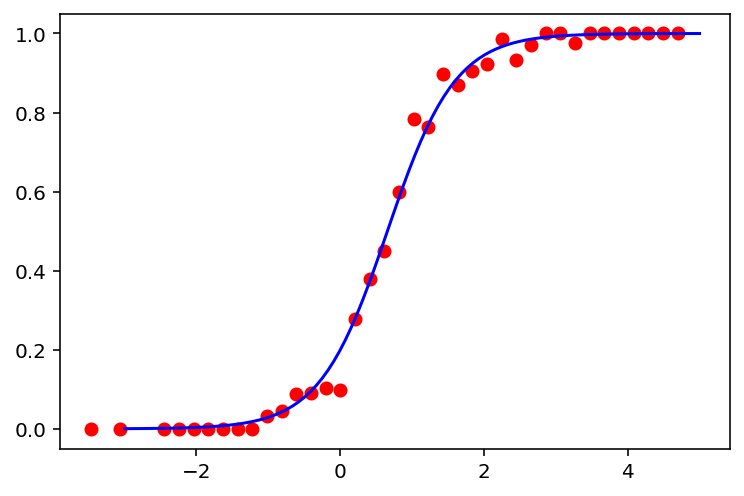

In [76]:
midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm) if x1+x2>0 ]
xs = [x for x,y in prob]
ys = [y for x,y in prob]
plt.plot(xs, ys, 'or')

xs = np.linspace(-3,5,100)[:, None]

plt.plot(xs, lgt.prob(xs), '-b')


## Logistic in Higher Dimension

Text(0, 0.5, 'x2')

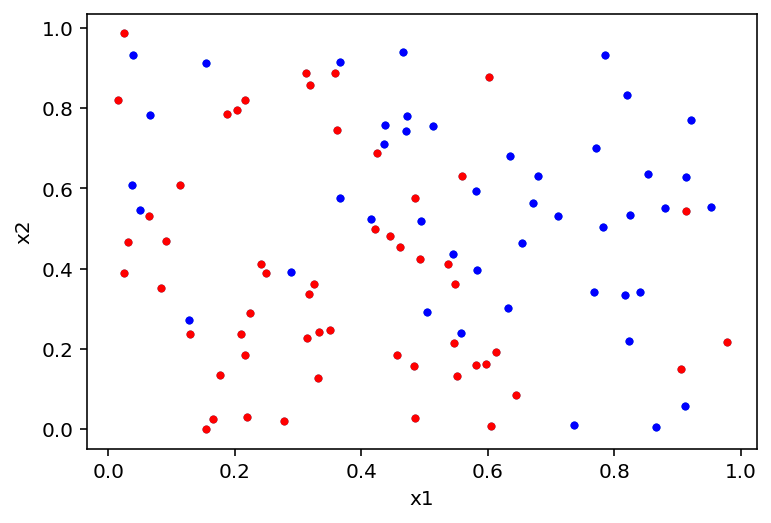

In [95]:
n = 100
np.random.seed(9999)
x1s = np.random.random(n)
x2s = np.random.random(n)
plt.plot(x1s, x2s, '.')
def sigm(x):
    return 1/(1+math.exp(-x))
ys = np.array([ np.random.rand() > sigm(5*x1 + 5*x2 - 5) for x1, x2 in zip(x1s, x2s)], float)
ys[ys==1] = 1
ys[ys==0] = -1

plt.plot(x1s[ys>0], x2s[ys>0], '.r')
plt.plot(x1s[ys<0], x2s[ys<0], '.b')

xs = np.vstack((x1s.T, x2s.T)) #this is how you stack them up vertically
pad_xs = np.vstack((np.ones(n), xs))
plt.xlabel('x1')
plt.ylabel('x2')

In [96]:
features = xs.T

In [98]:
features

array([[8.23389074e-01, 2.19913133e-01],
       [2.18602745e-01, 3.04693402e-02],
       [3.14610089e-02, 4.65931572e-01],
       [5.45926167e-01, 2.15054179e-01],
       [1.54455620e-01, 5.93181305e-04],
       [1.86963293e-01, 7.84607670e-01],
       [4.22347694e-01, 4.99103395e-01],
       [6.05552500e-01, 7.66861445e-03],
       [4.92354112e-01, 4.24299815e-01],
       [6.44119068e-01, 8.49955913e-02],
       [9.13049479e-01, 5.43764850e-01],
       [7.71104109e-01, 7.00943709e-01],
       [2.88361219e-01, 3.91658296e-01],
       [4.15441344e-01, 5.25075779e-01],
       [3.31490435e-01, 1.27488882e-01],
       [3.66326695e-01, 9.14510902e-01],
       [3.12195338e-01, 8.88713833e-01],
       [5.80445843e-01, 5.93787914e-01],
       [1.12951728e-01, 6.09095720e-01],
       [3.25874860e-01, 3.61007271e-01],
       [8.52729473e-01, 6.36349277e-01],
       [1.66025550e-01, 2.59492013e-02],
       [4.82478333e-01, 1.56678890e-01],
       [5.51030567e-01, 1.32910915e-01],
       [6.025175

In [102]:
lgt = Logistic()
lgt.train(features, ys)
lgt.w

(100, 4)


array([ 1.97335214,  1.97335214, -4.52535097, -3.40433472])

1) Perform a logistic regression on the given data. What is your $s$ now?

2) What is the equation for the line that represent $P(y=1|\vec{x})=0.5$. Recall that sigmoid(0)=0.5. Draw it along with the data.

3) Now try 0.3 and 0.7 line.

# ROC Curve (receiver operating characteristic)

Let us consider a fingerprint application to authenticate people through super secret stuff. So the class +1 means authenticate and -1 means denied entry.

1) What is True Positive?

2) What is False Positive?

3) What is False Positive?

4) What is False Negative?

5) Which of the above number you want to be high and which of the above number you want to be low?

6) Where would you place a cut on classifier output to make True Positive rate really high? What 's wrong with that?

7) Where would you place a cut on classifier output to make True Negative rate really high? What 's wrong with that?

8) If we place a cut at 0.3. What are the numbers for "True positive sample", "True negative sample", "False postive samples", "False negative samples"

Write a function to do that we need it later.

9) If we place a cut at 0.3. What is "True positive **rate**", "True negative **rate**", "False postive **rate**", "False negative **rate**" 

Write a function to do that. We will need it later.

10) If we place a cut at 0.7. Which of the rate would be higher and which of the rate would be lower? (Reason first, then run the code and see if it matches)

11) Vary the cut and plot True positive rate on y axis and false positive rate on x axis. This curve is called ROC curve.
if you classifier is good which corner it should go?

12) Consider these two fingerprint application and tell relatively where we should place a cut(which one with higher cut?)

A) FBI Door fingerprint.

B) Supermarket membership where use scan finger to verify the membership.